In [1]:
import gdal
import cv2
import numpy as np  
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
import random
lab_name=["./GID_samples/GF2_PMS1__L1A0001680858-MSS1_label.tifpart0.csv",
 "./GID_samples/GF2_PMS1__L1A0001680858-MSS1_label.tifpart1.csv",
 "./GID_samples/GF2_PMS1__L1A0001680858-MSS1_label.tifpart2.csv",
 "./GID_samples/GF2_PMS1__L1A0001680858-MSS1_label.tifpart3.csv",
 "./GID_samples/GF2_PMS1__L1A0001680858-MSS1_label.tifpart4.csv",
 "./GID_samples/GF2_PMS1__L1A0001680858-MSS1_label.tifpart5.csv",
 "./GID_samples/GF2_PMS1__L1A0001680858-MSS1_label.tifpart6.csv",
 "./GID_samples/GF2_PMS1__L1A0001680858-MSS1_label.tifpart7.csv",
 "./GID_samples/GF2_PMS1__L1A0001680858-MSS1_label.tifpart8.csv",
 "./GID_samples/GF2_PMS1__L1A0001680858-MSS1_label.tifpart9.csv",
 "./GID_samples/GF2_PMS2__L1A0000607677-MSS2_label.tifpart0.csv",
 "./GID_samples/GF2_PMS2__L1A0000607677-MSS2_label.tifpart1.csv",
 "./GID_samples/GF2_PMS2__L1A0000607677-MSS2_label.tifpart2.csv",
 "./GID_samples/GF2_PMS2__L1A0000607677-MSS2_label.tifpart3.csv",
 "./GID_samples/GF2_PMS2__L1A0000607677-MSS2_label.tifpart4.csv",
 "./GID_samples/GF2_PMS2__L1A0000607677-MSS2_label.tifpart5.csv",
 "./GID_samples/GF2_PMS2__L1A0000607677-MSS2_label.tifpart6.csv",
 "./GID_samples/GF2_PMS2__L1A0000607677-MSS2_label.tifpart7.csv",
 "./GID_samples/GF2_PMS2__L1A0000607677-MSS2_label.tifpart8.csv",
 "./GID_samples/GF2_PMS2__L1A0000607677-MSS2_label.tifpart9.csv",
 "./GID_samples/GF2_PMS2__L1A0000607681-MSS2_label.tifpart0.csv",
 "./GID_samples/GF2_PMS2__L1A0000607681-MSS2_label.tifpart1.csv",
 "./GID_samples/GF2_PMS2__L1A0000607681-MSS2_label.tifpart2.csv",
 "./GID_samples/GF2_PMS2__L1A0000607681-MSS2_label.tifpart3.csv",
 "./GID_samples/GF2_PMS2__L1A0000607681-MSS2_label.tifpart4.csv",
 "./GID_samples/GF2_PMS2__L1A0000607681-MSS2_label.tifpart5.csv",
 "./GID_samples/GF2_PMS2__L1A0000607681-MSS2_label.tifpart6.csv",
 "./GID_samples/GF2_PMS2__L1A0000607681-MSS2_label.tifpart7.csv",
 "./GID_samples/GF2_PMS2__L1A0000607681-MSS2_label.tifpart8.csv",
 "./GID_samples/GF2_PMS2__L1A0000607681-MSS2_label.tifpart9.csv",]
tif_name=["./GID_samples/GF2_PMS1__L1A0001680858-MSS1.tifpart0.csv",
 "./GID_samples/GF2_PMS1__L1A0001680858-MSS1.tifpart1.csv",
 "./GID_samples/GF2_PMS1__L1A0001680858-MSS1.tifpart2.csv",
 "./GID_samples/GF2_PMS1__L1A0001680858-MSS1.tifpart3.csv",
 "./GID_samples/GF2_PMS1__L1A0001680858-MSS1.tifpart4.csv",
 "./GID_samples/GF2_PMS1__L1A0001680858-MSS1.tifpart5.csv",
 "./GID_samples/GF2_PMS1__L1A0001680858-MSS1.tifpart6.csv",
 "./GID_samples/GF2_PMS1__L1A0001680858-MSS1.tifpart7.csv",
 "./GID_samples/GF2_PMS1__L1A0001680858-MSS1.tifpart8.csv",
 "./GID_samples/GF2_PMS1__L1A0001680858-MSS1.tifpart9.csv",
 "./GID_samples/GF2_PMS2__L1A0000607677-MSS2.tifpart0.csv",
 "./GID_samples/GF2_PMS2__L1A0000607677-MSS2.tifpart1.csv",
 "./GID_samples/GF2_PMS2__L1A0000607677-MSS2.tifpart2.csv",
 "./GID_samples/GF2_PMS2__L1A0000607677-MSS2.tifpart3.csv",
 "./GID_samples/GF2_PMS2__L1A0000607677-MSS2.tifpart4.csv",
 "./GID_samples/GF2_PMS2__L1A0000607677-MSS2.tifpart5.csv",
 "./GID_samples/GF2_PMS2__L1A0000607677-MSS2.tifpart6.csv",
 "./GID_samples/GF2_PMS2__L1A0000607677-MSS2.tifpart7.csv",
 "./GID_samples/GF2_PMS2__L1A0000607677-MSS2.tifpart8.csv",
 "./GID_samples/GF2_PMS2__L1A0000607677-MSS2.tifpart9.csv",
 "./GID_samples/GF2_PMS2__L1A0000607681-MSS2.tifpart0.csv",
 "./GID_samples/GF2_PMS2__L1A0000607681-MSS2.tifpart1.csv",
 "./GID_samples/GF2_PMS2__L1A0000607681-MSS2.tifpart2.csv",
 "./GID_samples/GF2_PMS2__L1A0000607681-MSS2.tifpart3.csv",
 "./GID_samples/GF2_PMS2__L1A0000607681-MSS2.tifpart4.csv",
 "./GID_samples/GF2_PMS2__L1A0000607681-MSS2.tifpart5.csv",
 "./GID_samples/GF2_PMS2__L1A0000607681-MSS2.tifpart6.csv",
 "./GID_samples/GF2_PMS2__L1A0000607681-MSS2.tifpart7.csv",
 "./GID_samples/GF2_PMS2__L1A0000607681-MSS2.tifpart8.csv",
 "./GID_samples/GF2_PMS2__L1A0000607681-MSS2.tifpart9.csv",]

indx=  [k for k in range(30)]    
random.shuffle(indx)
#1.打乱文件的索引顺序，这样就能乱序训练了
rslt1=[]
rslt2=[]
rslt3=[]

100%|██████████| 14/14 [20:58<00:00, 89.86s/it]

[0.3798549836601307, 0.5332060866013072, 0.39658680555555553, 0.6829005310457517, 0.3165422794117647, 0.601923202614379, 0.41875428921568625, 0.36457250816993464, 0.2947328431372549, 0.4512169117647059, 0.2124593545751634, 0.5376166258169934, 0.2546139705882353, 0.6401613562091504, 0.5848092320261438]


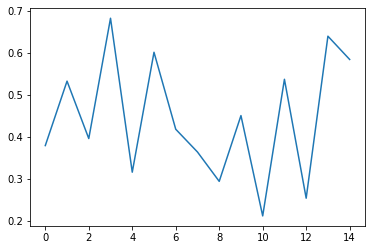

In [2]:
clf = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(10,5), random_state=1)

X=np.loadtxt(tif_name[0])
y =np.loadtxt(lab_name[0])#.reshape(-1, 1)
Xt=np.loadtxt(tif_name[29])
yt=np.loadtxt(lab_name[29])#.reshape(-1, 1)
clf.partial_fit(X, y,classes=np.array([[0],[1],[2],[3],[4],[5]]))
#2.第一个子数据的训练
scr=clf.score(Xt,yt)
rslt1.append(scr)
#3.第一次训练的结果
for n in tqdm(indx[1:-15]) :
    
    X=np.loadtxt(tif_name[n])
    y =np.loadtxt(lab_name[n])#.reshape(-1, 1)
    
    Xt=np.loadtxt(tif_name[29-n])
    yt=np.loadtxt(lab_name[29-n])#.reshape(-1, 1)
    
    clf.partial_fit(X, y )
    scr=clf.score(Xt,yt)
    rslt1.append(scr)
#4。逐渐增量到15个子数据的训练结果
print(rslt1)
plt.plot(rslt1)
plt.show()

100%|██████████| 14/14 [19:22<00:00, 83.03s/it]

[0.4433549836601307, 0.505360498366013, 0.3002530637254902, 0.24682148692810457, 0.2566158088235294, 0.3604750816993464, 0.5609240196078431, 0.28608496732026145, 0.5068960375816993, 0.4410749591503268, 0.2678862336601307, 0.30572896241830066, 0.5390173611111111, 0.6195557598039215, 0.5006748366013072]


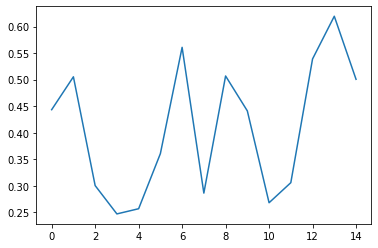

In [3]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log')
X=np.loadtxt(tif_name[0])
y =np.loadtxt(lab_name[0])#.reshape(-1, 1)
Xt=np.loadtxt(tif_name[29])
yt=np.loadtxt(lab_name[29])#.reshape(-1, 1)
clf.partial_fit(X, y,classes=np.array([[0],[1],[2],[3],[4],[5]]))
scr=clf.score(Xt,yt)
rslt2.append(scr)
for n in tqdm(indx[1:-15]) :
    
    X=np.loadtxt(tif_name[n])
    y =np.loadtxt(lab_name[n])#.reshape(-1, 1)
    
    Xt=np.loadtxt(tif_name[29-n])
    yt=np.loadtxt(lab_name[29-n])#.reshape(-1, 1)
    
    clf.partial_fit(X, y )
    scr=clf.score(Xt,yt)
    rslt2.append(scr)
print(rslt2)
plt.plot(rslt2)
plt.show()

/home/shenchao/.local/lib/python3.6/site-packages/sklearn/naive_bayes.py:449: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
100%|██████████| 14/14 [18:14<00:00, 78.20s/it]

[0.3620422794117647, 0.4366390931372549, 0.4485718954248366, 0.4467060866013072, 0.45198774509803924, 0.5156909722222223, 0.48924101307189544, 0.4898190359477124, 0.4198970588235294, 0.5149438316993464, 0.4889601715686275, 0.522812091503268, 0.402421772875817, 0.465171772875817, 0.5268462009803921]


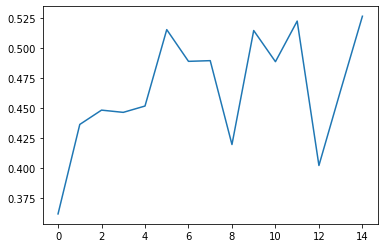

In [4]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
X=np.loadtxt(tif_name[0])
y =np.loadtxt(lab_name[0])#.reshape(-1, 1)
Xt=np.loadtxt(tif_name[29])
yt=np.loadtxt(lab_name[29])#.reshape(-1, 1)
clf.partial_fit(X, y,classes=np.array([[0],[1],[2],[3],[4],[5]]))
scr=clf.score(Xt,yt)
rslt3.append(scr)
for n in tqdm(indx[1:-15]) :
    
    X=np.loadtxt(tif_name[n])
    y =np.loadtxt(lab_name[n])#.reshape(-1, 1)
    
    Xt=np.loadtxt(tif_name[29-n])
    yt=np.loadtxt(lab_name[29-n])#.reshape(-1, 1)
    
    clf.partial_fit(X, y )
    scr=clf.score(Xt,yt)
    rslt3.append(scr)
print(rslt3)
plt.plot(rslt3)
plt.show()

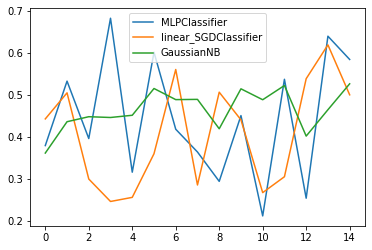

In [5]:
plt.plot(rslt1)
plt.plot(rslt2)
plt.plot(rslt3)
plt.legend(['MLPClassifier','linear_SGDClassifier','GaussianNB'])
plt.show()